### Come back to [Introduction](Introduction.ipynb)

# Amazon Customer Reviews Dataset
Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.

### Documentation: 
https://s3.amazonaws.com/amazon-reviews-pds/readme.html

### List of databases link: 
https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

### Database's link: 
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_UK_v1_00.tsv.gz

Here we import the modules that we will need in order to extract the data manipulate them 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
from prettytable import PrettyTable as PT

This variable will hold the path of our raw dataset

In [4]:
PATH_DATA = "C:/Users/Tosodoulis/Desktop/All The Folders/DTU Courses/First Semester/02805-Social Graphs and Interactions/final/final/"

In [5]:
"""
\brief The function returns the percentage given the value and its total 
\param value (int/float)
\param tot (int/float)
\return float: the actual percentage
"""
def percent(value,tot):
    return value/float(tot)*100

We recognize that we have some data which are "corrupted". For those data we are going to set the date to 1900-01-01. Then we are going to delete them.

In [6]:
def parserDate(x):
    try:
        return datetime.datetime.strptime(x, '%Y-%m-%d')
    except ValueError:
        return datetime.datetime.strptime("1900-01-01", '%Y-%m-%d')

In this block we make use of the **pandas** module, which helps us read the raw dataset and transform it to a dataframe which is easier to read and extract information from it. From the original dataset we are going to use only 8 out of the 14 columns. Those are: customer_id, product_id, product_title, product_category, star_rating, review_headline, review_body and review_date

In [7]:
df =  pd.read_csv(
    "%sdata.tsv" % PATH_DATA, 
    encoding="utf-8", 
    header=0,
    sep='\t',
    usecols=['customer_id', 'product_id', 'product_title','product_category','star_rating','review_headline','review_body','review_date'],
    dtype = {
        #'marketplace':str,
        'customer_id':str,
        #'review_id':str,
        'product_id':str,
        #'product_parent':str,
        'product_title':str,
        'product_category':str,
        'star_rating': np.uint8,
        #'helpful_votes': np.uint16,
        #'total_votes': np.uint16,
        #'vine':str,
        #'verified_purchase':bool,
        'review_headline':str,
        'review_body':str,
        },
    parse_dates = ['review_date'],
    true_values = ["Y"],
    false_values  = ["N"],
    skipinitialspace = True,
    date_parser=parserDate,
    infer_datetime_format = True,
    error_bad_lines = False,
    warn_bad_lines = True,
    engine='c',
    )

In [9]:
df.index.names = ['review_id']

Here we represent a table with the first 10 raws of the that we just created. new dataframe that we just created.

In [10]:
df.head()

,customer_id,product_id,product_title,product_category,star_rating,review_headline,review_body,review_date
review_id,,,,,,,,
0,10349,B00MWK7BWG,My Favourite Faded Fantasy,Music,5,Five Stars,The best album ever!,2014-12-29
1,10629,B006CHML4I,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,Great watch from casio.,What a great watch. Both watches and strap is ...,2013-10-24
2,12136,B00IIFCJX0,Dexter Season 8,Digital_Video_Download,5,fantastic,"love watching all the episodes of Dexter, when...",2014-05-09
3,12268,B000W7JWUA,The Settlers of Catan Board Game - discontinue...,Toys,5,Five Stars,Excellent game!!!,2014-09-19
4,12677,B005JTAP4S,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5,A twist on Tales,"This cute, quick read is very different to say...",2013-09-18


In [94]:
df['review_date'] = pd.to_datetime(df['review_date'])

Below, we check if there are corructed data that cannot be used for further manipulation

In [12]:
print("There are %d of corrupted data" % df[df.review_date=="1900-01-01"].count()[0])

There are 55 of corrupted data


And finally we delete those raws from the our dataset

In [13]:
df = df.drop(df[df.review_date=="1900-01-01"].index)

Check if there are NaN values

In [15]:
print("There are %d of nan values" % df.isnull().values.sum())

There are 21 of nan values


Removing rows which contain NaN values

In [16]:
df = df.dropna()

# Filtering of categories with less then 1000 reviews

Because there are a lot of categories in our dataset, we decided to exclude some of them and filter them away if they had less than 1000 reviews. The code below shows the methodology that we implemented.

In [19]:
categories = sorted(df.product_category.unique().tolist())

In [27]:
tempCategories = []
delCategories = []
N = 1000 #inferior limit
for c in categories:
    if(df[df.product_category==c].count()[0])>=N:
        tempCategories.append(c)
    else:
        delCategories.append(c)
tot = df.count()[0]
NKeep = df[df['product_category'].isin(tempCategories)].count()[0]
NDisc = tot-NKeep
print("CATEGORIES KEEPED (%d): %s" % (len(tempCategories),", ".join(tempCategories)))
print("WE ARE KEEPING %d/%d (%.2f%%) REVIEWS" % (NKeep,tot,percent(NKeep,tot)))
print("\nCATEGORIES REMOVED (%d): %s" % (len(delCategories),", ".join(delCategories)))
print("WE ARE DISCARDING %d/%d (%.2f%%) REVIEWS" % (NDisc,tot,percent(NDisc,tot)))

CATEGORIES KEEPED (20): Baby, Books, Camera, Digital_Ebook_Purchase, Digital_Music_Purchase, Digital_Video_Download, Electronics, Home, Mobile_Apps, Music, Musical Instruments, PC, Shoes, Sports, Toys, Video, Video DVD, Video Games, Watches, Wireless
WE ARE KEEPING 1702443/1705765 (99.81%) REVIEWS

CATEGORIES REMOVED (13): Apparel, Automotive, Beauty, Health & Personal Care, Home Entertainment, Home Improvement, Kitchen, Lawn and Garden, Luggage, Office Products, Personal_Care_Appliances, Pet Products, Software
WE ARE DISCARDING 3322/1705765 (0.19%) REVIEWS


In [28]:
categories = tempCategories
df = df[df['product_category'].isin(categories)]

### Number of reviews

We import the **seaborn** module to help us create intuitive graphs

In [29]:
import seaborn as sns

The graph below shows the star rating of the reviews as seen by the customers

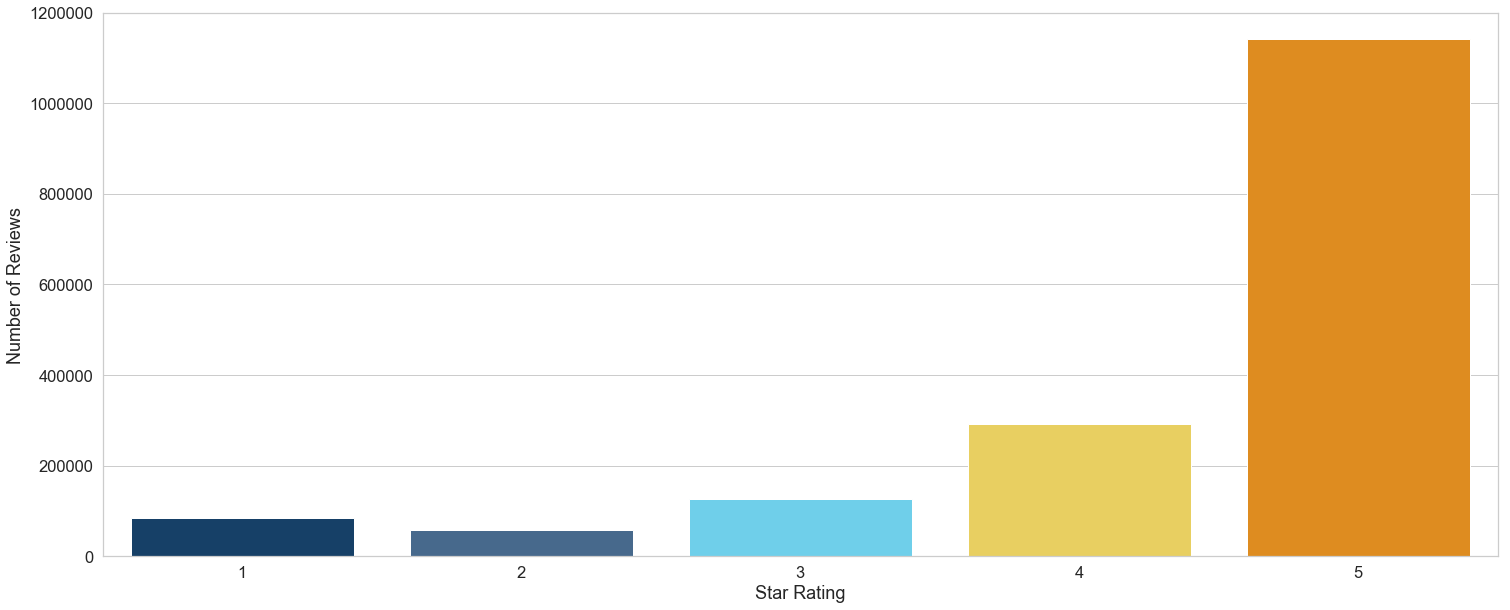

In [84]:
star_table = df[["star_rating","product_category"]].groupby(["star_rating"]).count().reset_index()
sns.set(font_scale=1.5,style="whitegrid",rc={'figure.figsize':(25,10)})
colors = ["#094074","#3c6997","#5adbff","#ffdd4a","#fe9000"]
sns.barplot(x ="star_rating",y ="product_category",palette=colors, data=star_table )
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.show()

And this graph shows the distribution of the reviews based on the category of the product

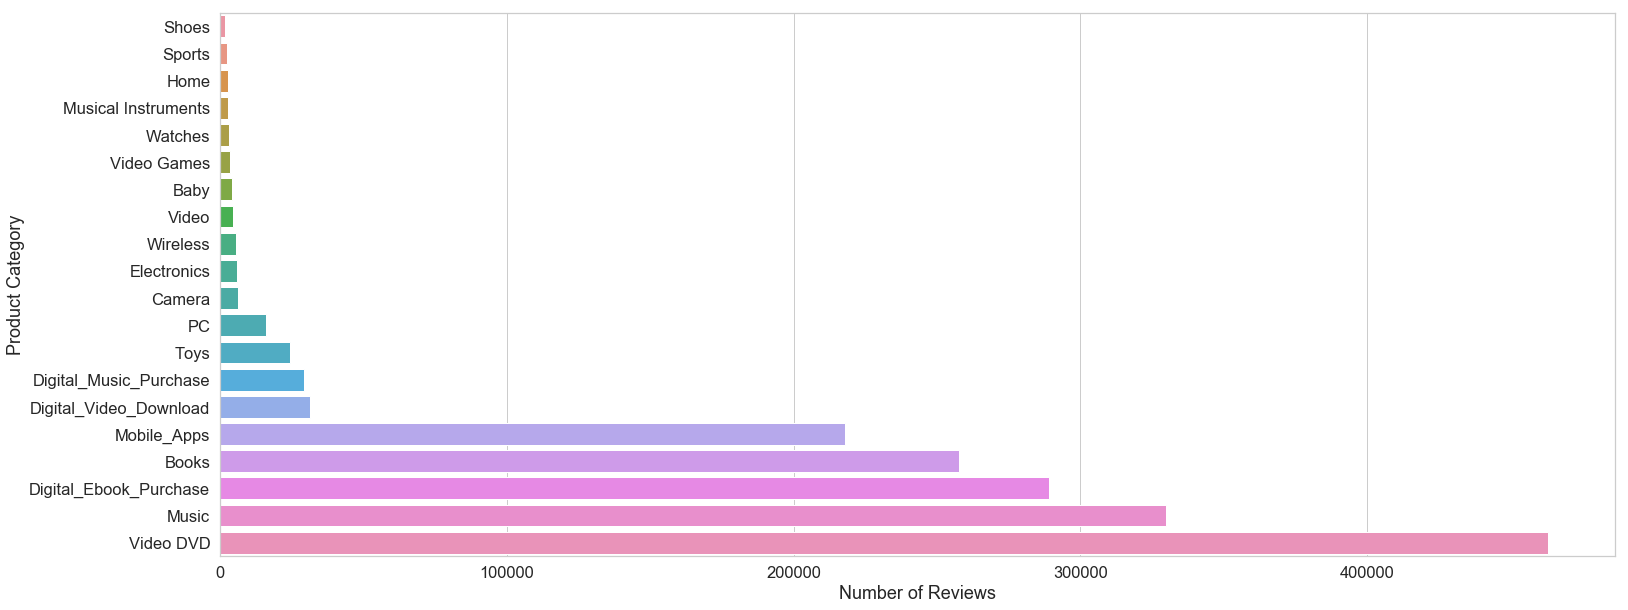

In [93]:
category_table = df[["product_category","review_headline"]].groupby(["product_category"]).count().reset_index().sort_values(["review_headline"])
sns.barplot(x="review_headline",y ="product_category", data=category_table)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Category")
plt.show()

# Structures 

In order for us to work faster and me more immediate, we decided to save the dataframe into a pickle file and store it locally. That saves us time because we read directly from the .pkl file instead of running again the code to reach a certain point.

In [88]:
df.to_pickle("%sAmazonDataProject.pkl" % PATH_DATA)

In [89]:
df_no_text = (df.drop(labels=["review_headline","review_body"],axis=1))

In [90]:
df_no_text.head()

,customer_id,product_id,product_title,product_category,star_rating,review_date
review_id,,,,,,
0,10349,B00MWK7BWG,My Favourite Faded Fantasy,Music,5,2014-12-29
1,10629,B006CHML4I,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,2013-10-24
2,12136,B00IIFCJX0,Dexter Season 8,Digital_Video_Download,5,2014-05-09
3,12268,B000W7JWUA,The Settlers of Catan Board Game - discontinue...,Toys,5,2014-09-19
4,12677,B005JTAP4S,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5,2013-09-18


In [92]:
df_no_text.to_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA)